# Import packages and define functions

In [1]:
from importlib import reload
import roman_phasec_proper_spc_wide as spcw
reload(spcw)

<module 'roman_phasec_proper_spc_wide' from '/home/u21/kianmilani/Documents/poppy-cuda-tests/roman_phasec_proper_spc_wide.py'>

In [12]:
reload(spcw)
fpm_thickness = 0.006363747896388863
fpm_index = spcw.glass_index('SILICA',lambda_m, spcw.data_dir)
d_fpm_oap6 = fpm_thickness / fpm_index + 0.543766629917668
d_fpm_oap6

0.5481466704471673

Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/polmap_proper.fits
Applying lens
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/primary_proper.fits
Propagating to secondary
Applying lens
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/secondary_proper.fits
Propagating to POMA FOLD
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/poma_fold_proper.fits
Propagating to M3
Applying lens
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/m3_proper.fits
Propagating to M4
Applying lens
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/m4_proper.fits
Propagating to M5
Applying lens
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/m5_proper.fits
Propagating to TT FOLD
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/tt_fold_proper.fits
Propagating to FSM
Wavefront saved to: 

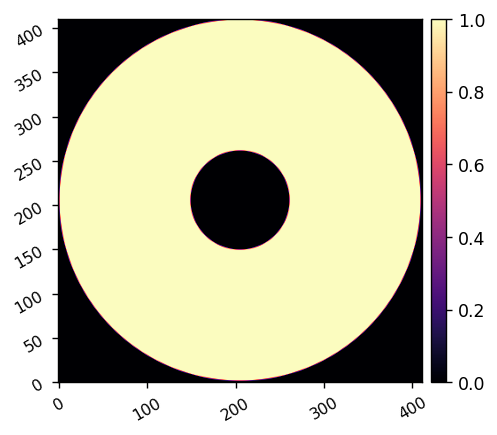

Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/fpm_proper.fits
Propagating to OAP6
Applying lens
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/oap6_proper.fits
Propagating to LYOT STOP
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/lyotstop_proper.fits
Propagating to OAP7
Applying lens
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/oap7_proper.fits
Propagating to FIELD_STOP
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/fieldstop_proper.fits
Propagating to OAP8
Applying lens
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/oap8_proper.fits
Propagating to filter
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/filter_proper.fits
Propagating to IMAGING_LENS
Applying lens at IMAGING_LENS lens #1
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/imaging_lens_l

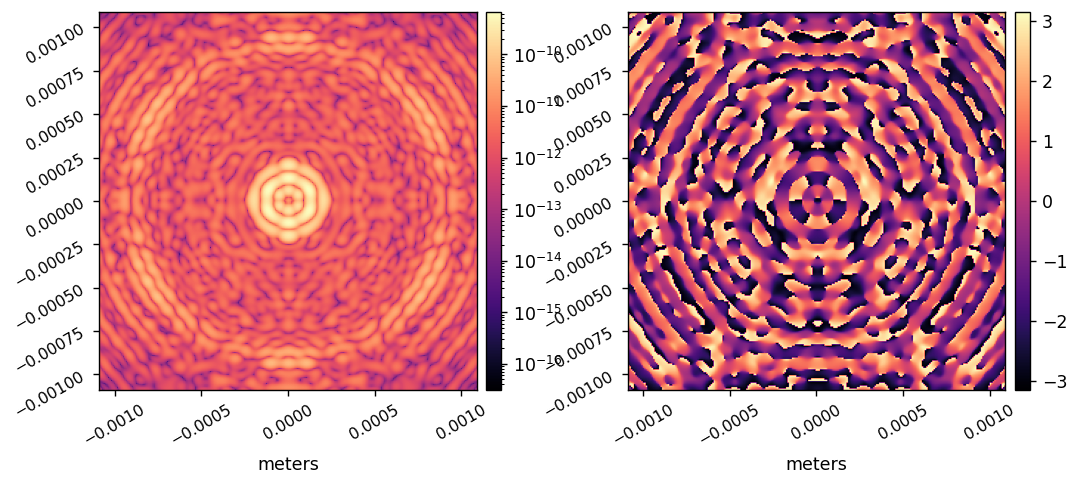

Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/image_proper.fits


In [16]:
reload(spcw)
spcw.display_wfs = False
spcw.save_wfs = True
spcw.save_maps = False
spcw.save_dms = False

cor_type='spc-wide'
lambda_m=825e-9
final_sampling_lam0=0.2
output_dim=256
source_x_offset=0
source_y_offset=0
use_fpm=1
use_errors=0
if use_errors==0: use_lens_errors=0
else: use_lens_errors=1
use_hlc_dm_patterns=0
use_dm1=0
use_dm2=0
dm1_fname='spc_wide_best_contrast_dm1.fits'
dm2_fname='spc_wide_best_contrast_dm2.fits'
polaxis=0
use_field_stop=0
use_pupil_defocus=0

wf_arr, wf_pxscl = spcw.run_spcw(cor_type=cor_type, lambda_m=lambda_m, final_sampling_lam0=final_sampling_lam0, 
                               output_dim=output_dim, 
                               source_x_offset=source_x_offset, source_y_offset=source_y_offset, 
                               use_fpm=use_fpm,
                               use_errors=use_errors, use_lens_errors=use_lens_errors, 
                               use_hlc_dm_patterns=use_hlc_dm_patterns,
                               use_dm1=use_dm1, use_dm2=use_dm2, dm1_fname=dm1_fname, dm2_fname=dm2_fname,
                               polaxis=polaxis, use_field_stop=use_field_stop, use_pupil_defocus=use_pupil_defocus)

# Check Results

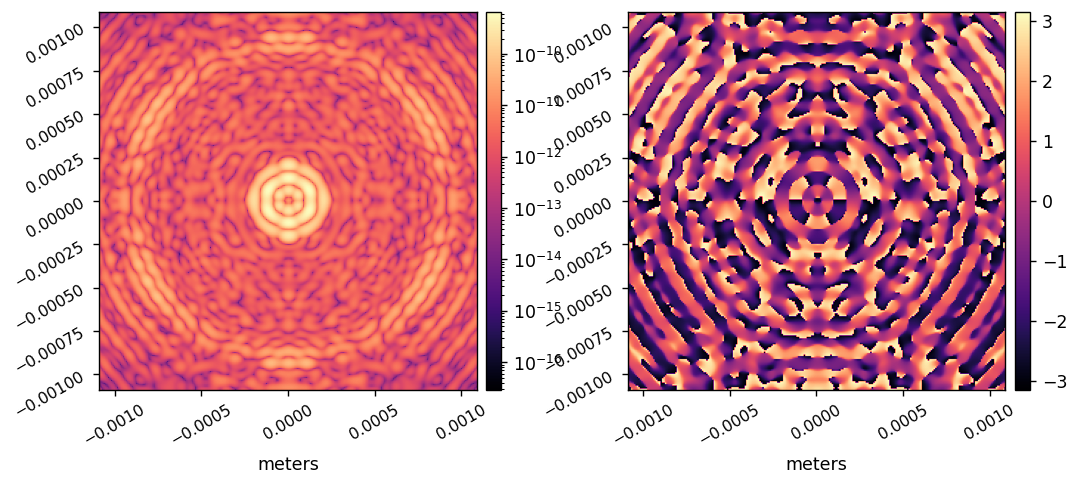

In [17]:
import numpy as np
import astropy.units as u
from IPython.display import clear_output
import proper
import roman_phasec_proper
import misc

if use_dm1==0: dm1_m = 0
else: dm1_m = proper.prop_fits_read( roman_phasec_proper.lib_dir + '/examples/' + dm1_fname )
if use_dm2==0: dm2_m = 0
else: dm2_m = proper.prop_fits_read( roman_phasec_proper.lib_dir + '/examples/' + dm2_fname )

lam_array = np.array([lambda_m*1e6])
(wfs, wfs_sampling_m) = proper.prop_run_multi('roman_phasec', lam_array, output_dim, QUIET=False, 
                                                PASSVALUE={'cor_type':cor_type,
                                                           'final_sampling_lam0':final_sampling_lam0, 
                                                           'source_x_offset':source_x_offset,
                                                           'use_fpm':use_fpm,
                                                           'use_hlc_dm_patterns':use_hlc_dm_patterns,
                                                           'use_errors': use_errors,
                                                           'use_lens_errors':use_lens_errors,
                                                           'use_pupil_defocus':use_pupil_defocus,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1_m, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2_m,
                                                           'use_field_stop':use_field_stop,
                                                           'polaxis':polaxis,
                                                          })
clear_output()

proper_psf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

misc.myimshow2(np.abs(proper_psf)**2, np.angle(proper_psf), lognorm1=True,
               pxscl1=psf_sampling_m, pxscl2=psf_sampling_m,)

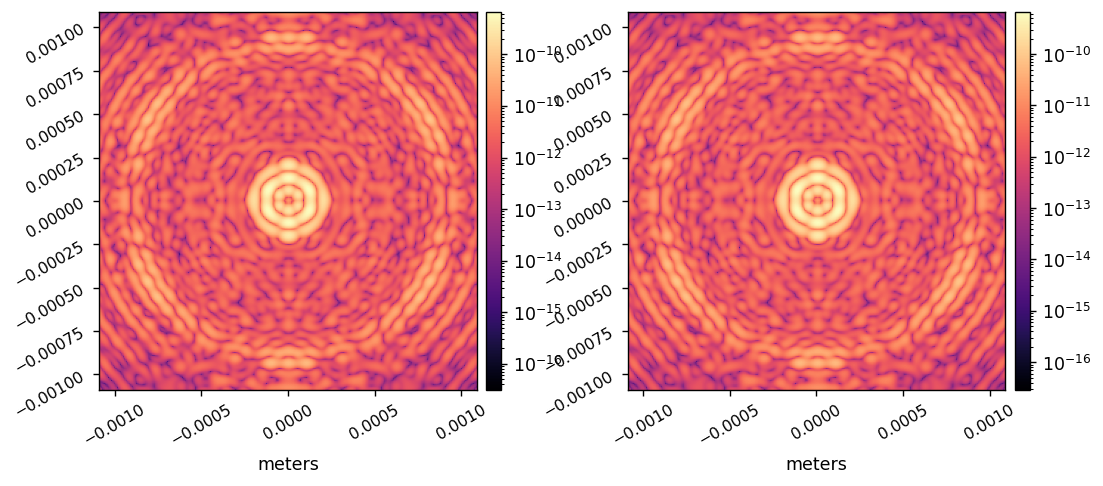

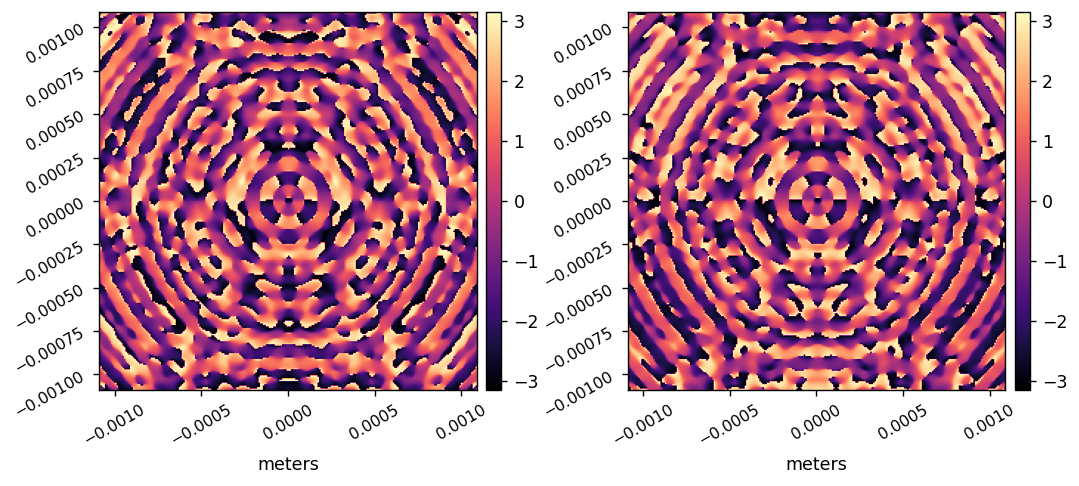

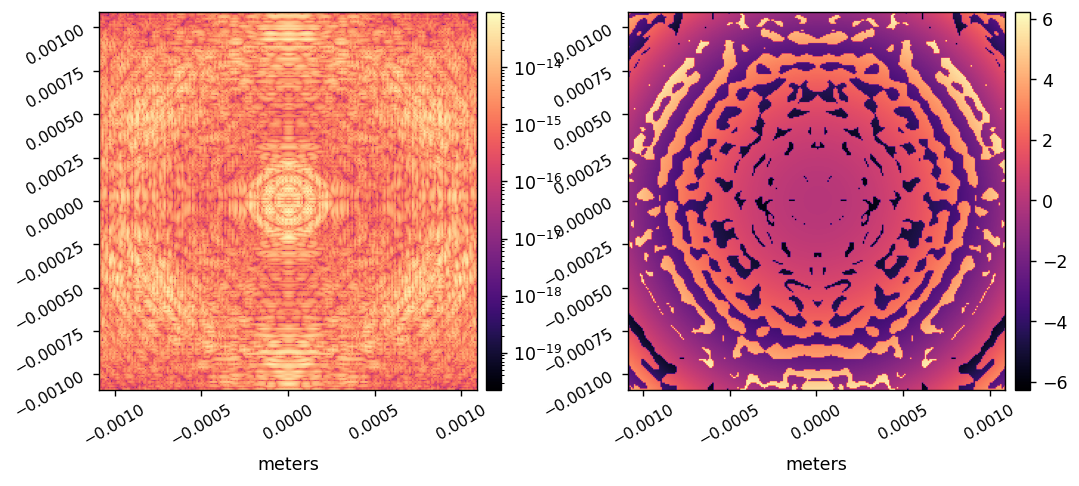

In [18]:
wf_int = np.abs(wf_arr)**2
wf_phase = np.angle(wf_arr)

int_diff = np.abs(np.abs(proper_psf)**2-wf_int)
phase_diff = np.angle(proper_psf)-wf_phase

misc.myimshow2(wf_int, np.abs(proper_psf)**2, lognorm1=True, lognorm2=True,
               pxscl1=psf_sampling_m, pxscl2=psf_sampling_m,)
misc.myimshow2(wf_phase, np.angle(proper_psf),
               pxscl1=psf_sampling_m, pxscl2=psf_sampling_m,)
misc.myimshow2(int_diff, phase_diff, lognorm1=True,
               pxscl1=psf_sampling_m, pxscl2=psf_sampling_m,)